In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score


## Loading Data 

In [2]:
df = pd.read_csv('Desktop/EVData.csv')


In [3]:
df

,Vehicle,Price,Real Range (Miles),EPA Range (Miles),Difference,Efficiency
0,2022 Lucid Air Dream Edition Range,"$169,000",500,520,-4.0%,4.30
1,2022 Mercedes EQS 450+,"$102,310",395,350,13.0%,3.67
2,"2022 BMW iX xDrive50 w/20"" Wheels","$83,200",345,324,6.5%,3.25
3,"2023 Cadillac Lyriq RWD w/20"" Wheels","$62,990",330,312,5.8%,3.15
4,2021 Tesla\nModel 3 AWD,"$48,990",310,353,-12.2%,4.25
5,2023 Porsche Taycan RWD 93 kWh Battery (New So...,"$81,150*",305,225,35.8%,3.66
6,"2021 Tesla Model S Plaid w/21"" Arachnid","$134,490",300,348,-12.0%,3.30
7,2021 Porsche \nTaycan RWD 93 kWh Battery,"$85,470*",293 297,225 225,+30.0% +32.0%,3.49 3.50
8,2019 Tesla Model 3 AWD,"$47,990",290,322,-10.0%,4.25
9,2021 Ford Mustang Mach-E California Route 1 Ed...,"$50,400",287,305,-6.0%,3.30


In [4]:
# Extract year and model name into separate columns from Vechile column
df[['Year', 'Model']] = df['Vehicle'].str.extract(r'(\d{4})\s*(.+)')

# Display the modified DataFrame
print(df)

                                              Vehicle      Price  \
0                  2022 Lucid Air Dream Edition Range   $169,000   
1                             2022 Mercedes  EQS 450+   $102,310   
2                   2022 BMW iX xDrive50 w/20" Wheels    $83,200   
3                2023 Cadillac Lyriq RWD w/20" Wheels    $62,990   
4                             2021 Tesla\nModel 3 AWD    $48,990   
5   2023 Porsche Taycan RWD 93 kWh Battery (New So...   $81,150*   
6             2021 Tesla Model S Plaid w/21" Arachnid   $134,490   
7            2021 Porsche \nTaycan RWD 93 kWh Battery   $85,470*   
8                             2019 Tesla  Model 3 AWD    $47,990   
9   2021 Ford Mustang Mach-E California Route 1 Ed...    $50,400   
10  2023 Ford Mustang Mach-E Premium AWD Extended ...    $66,295   
11                    2020 Porsche \nTaycan 4S 93 kWh  $103,800*   
12                           2020 Tesla \nModel Y AWD    $49,990   
13          2022 Ford Lightning Lariat Extended 

In [5]:
df

,Vehicle,Price,Real Range (Miles),EPA Range (Miles),Difference,Efficiency,Year,Model
0,2022 Lucid Air Dream Edition Range,"$169,000",500,520,-4.0%,4.30,2022,Lucid Air Dream Edition Range
1,2022 Mercedes EQS 450+,"$102,310",395,350,13.0%,3.67,2022,Mercedes EQS 450+
2,"2022 BMW iX xDrive50 w/20"" Wheels","$83,200",345,324,6.5%,3.25,2022,"BMW iX xDrive50 w/20"" Wheels"
3,"2023 Cadillac Lyriq RWD w/20"" Wheels","$62,990",330,312,5.8%,3.15,2023,"Cadillac Lyriq RWD w/20"" Wheels"
4,2021 Tesla\nModel 3 AWD,"$48,990",310,353,-12.2%,4.25,2021,Tesla
5,2023 Porsche Taycan RWD 93 kWh Battery (New So...,"$81,150*",305,225,35.8%,3.66,2023,Porsche Taycan RWD 93 kWh Battery (New Software)
6,"2021 Tesla Model S Plaid w/21"" Arachnid","$134,490",300,348,-12.0%,3.30,2021,"Tesla Model S Plaid w/21"" Arachnid"
7,2021 Porsche \nTaycan RWD 93 kWh Battery,"$85,470*",293 297,225 225,+30.0% +32.0%,3.49 3.50,2021,Porsche
8,2019 Tesla Model 3 AWD,"$47,990",290,322,-10.0%,4.25,2019,Tesla Model 3 AWD
9,2021 Ford Mustang Mach-E California Route 1 Ed...,"$50,400",287,305,-6.0%,3.30,2021,Ford Mustang Mach-E California Route 1 Edition


In [6]:
#drop Vechile column 
df=df.drop('Vehicle',axis=1)
df

,Price,Real Range (Miles),EPA Range (Miles),Difference,Efficiency,Year,Model
0,"$169,000",500,520,-4.0%,4.30,2022,Lucid Air Dream Edition Range
1,"$102,310",395,350,13.0%,3.67,2022,Mercedes EQS 450+
2,"$83,200",345,324,6.5%,3.25,2022,"BMW iX xDrive50 w/20"" Wheels"
3,"$62,990",330,312,5.8%,3.15,2023,"Cadillac Lyriq RWD w/20"" Wheels"
4,"$48,990",310,353,-12.2%,4.25,2021,Tesla
5,"$81,150*",305,225,35.8%,3.66,2023,Porsche Taycan RWD 93 kWh Battery (New Software)
6,"$134,490",300,348,-12.0%,3.30,2021,"Tesla Model S Plaid w/21"" Arachnid"
7,"$85,470*",293 297,225 225,+30.0% +32.0%,3.49 3.50,2021,Porsche
8,"$47,990",290,322,-10.0%,4.25,2019,Tesla Model 3 AWD
9,"$50,400",287,305,-6.0%,3.30,2021,Ford Mustang Mach-E California Route 1 Edition


## Cleaning and Handling Data 

In [7]:
df.dtypes

Price                 object
Real Range (Miles)    object
EPA Range (Miles)     object
Difference            object
Efficiency            object
Year                  object
Model                 object
dtype: object

In [8]:
#Remove non numeric char ($) in proce table
df['Price'] = df['Price'].replace('[\$,]', '', regex=True)
df.rename(columns={'Price':'Price ($)'},inplace=True)
# Display the modified DataFrame
df

,Price ($),Real Range (Miles),EPA Range (Miles),Difference,Efficiency,Year,Model
0,169000,500,520,-4.0%,4.30,2022,Lucid Air Dream Edition Range
1,102310,395,350,13.0%,3.67,2022,Mercedes EQS 450+
2,83200,345,324,6.5%,3.25,2022,"BMW iX xDrive50 w/20"" Wheels"
3,62990,330,312,5.8%,3.15,2023,"Cadillac Lyriq RWD w/20"" Wheels"
4,48990,310,353,-12.2%,4.25,2021,Tesla
5,81150*,305,225,35.8%,3.66,2023,Porsche Taycan RWD 93 kWh Battery (New Software)
6,134490,300,348,-12.0%,3.30,2021,"Tesla Model S Plaid w/21"" Arachnid"
7,85470*,293 297,225 225,+30.0% +32.0%,3.49 3.50,2021,Porsche
8,47990,290,322,-10.0%,4.25,2019,Tesla Model 3 AWD
9,50400,287,305,-6.0%,3.30,2021,Ford Mustang Mach-E California Route 1 Edition


In [9]:
df['Price ($)']

0      169000
1      102310
2       83200
3       62990
4       48990
5      81150*
6      134490
7      85470*
8       47990
9       50400
10      66295
11    103800*
12      49990
13      77474
14      79500
15      93700
16     153500
17      56400
18      65900
19      37190
20      43995
21      45900
22      50300
23      36620
24      59990
25      54500
26      69900
27      43900
28      39974
29      74800
30      33045
31      47650
32      51500
33      29990
34      25995
35      28750
Name: Price ($), dtype: object

In [10]:
#remove * from clumns 
df['Price ($)'] = df['Price ($)'].str.replace('*', '')
df

/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_20664/3726820158.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price ($)'] = df['Price ($)'].str.replace('*', '')


,Price ($),Real Range (Miles),EPA Range (Miles),Difference,Efficiency,Year,Model
0,169000,500,520,-4.0%,4.30,2022,Lucid Air Dream Edition Range
1,102310,395,350,13.0%,3.67,2022,Mercedes EQS 450+
2,83200,345,324,6.5%,3.25,2022,"BMW iX xDrive50 w/20"" Wheels"
3,62990,330,312,5.8%,3.15,2023,"Cadillac Lyriq RWD w/20"" Wheels"
4,48990,310,353,-12.2%,4.25,2021,Tesla
5,81150,305,225,35.8%,3.66,2023,Porsche Taycan RWD 93 kWh Battery (New Software)
6,134490,300,348,-12.0%,3.30,2021,"Tesla Model S Plaid w/21"" Arachnid"
7,85470,293 297,225 225,+30.0% +32.0%,3.49 3.50,2021,Porsche
8,47990,290,322,-10.0%,4.25,2019,Tesla Model 3 AWD
9,50400,287,305,-6.0%,3.30,2021,Ford Mustang Mach-E California Route 1 Edition


In [11]:
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')


In [12]:
df['Real Range (Miles)']

0         500
1         395
2         345
3         330
4         310
5         305
6         300
7     293 297
8         290
9         287
10        285
11        278
12        276
13        270
14        254
15        252
16        246
17        245
18        239
19        238
20        234
21        227
22        226
23        226
24        226
25        195
26        195
27        190
28        214
29        188
30        171
31        141
32        126
33        108
34         63
35         51
Name: Real Range (Miles), dtype: object

In [13]:
def clean_and_average(column):
    # Replace non-numeric characters and split the values
    df[column] = df[column].str.replace(r'\D', ' ').str.split()

    # Convert the lists of strings to lists of numbers (to split two values in the same row)
    df[column] = df[column].apply(lambda x: [int(i) for i in x] if isinstance(x, list) else x)

    # Calculate the average for each row
    df[column] = df[column].apply(lambda x: sum(x) / len(x) if isinstance(x, list) else x)
clean_and_average('Real Range (Miles)')



/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_20664/1844738572.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r'\D', ' ').str.split()


In [14]:
df

,Price ($),Real Range (Miles),EPA Range (Miles),Difference,Efficiency,Year,Model
0,169000,500.0,520,-4.0%,4.30,2022,Lucid Air Dream Edition Range
1,102310,395.0,350,13.0%,3.67,2022,Mercedes EQS 450+
2,83200,345.0,324,6.5%,3.25,2022,"BMW iX xDrive50 w/20"" Wheels"
3,62990,330.0,312,5.8%,3.15,2023,"Cadillac Lyriq RWD w/20"" Wheels"
4,48990,310.0,353,-12.2%,4.25,2021,Tesla
5,81150,305.0,225,35.8%,3.66,2023,Porsche Taycan RWD 93 kWh Battery (New Software)
6,134490,300.0,348,-12.0%,3.30,2021,"Tesla Model S Plaid w/21"" Arachnid"
7,85470,295.0,225 225,+30.0% +32.0%,3.49 3.50,2021,Porsche
8,47990,290.0,322,-10.0%,4.25,2019,Tesla Model 3 AWD
9,50400,287.0,305,-6.0%,3.30,2021,Ford Mustang Mach-E California Route 1 Edition


 will noticet that row 7 the value of  Real Range (Miles)	replaced  by the average of both values

In [15]:
#now in the same way clean column of EPA Range (Miles)
clean_and_average('EPA Range (Miles)')


/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_20664/1844738572.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r'\D', ' ').str.split()


In [16]:

df.dtypes

Price ($)               int64
Real Range (Miles)    float64
EPA Range (Miles)     float64
Difference             object
Efficiency             object
Year                   object
Model                  object
dtype: object

In [17]:
df['Difference']

0             -4.0%
1             13.0%
2              6.5%
3              5.8%
4            -12.2%
5             35.8%
6            -12.0%
7     +30.0% +32.0%
8            -10.0%
9             -6.0%
10            -1.7%
11            36.9%
12           -12.7%
13           -15.6%
14           -19.1%
15            17.2%
16            20.6%
17            -10.6
18             5.3%
19            -7.8%
20            -6.4%
21           -11.3%
22             7.1%
23           -12.7%
24            -3.1%
25           -24.0%
26           -16.7%
27           -11.6%
28            -7.0%
29            -7.9%
30             0.6%
31            -7.8%
32             0.0%
33            -1.8%
34           -23.2%
35           -10.5%
Name: Difference, dtype: object

In [18]:
# Replace non-numeric characters and split the values
df['Difference'] = df['Difference'].str.replace(r'[^0-9.-]+', ' ', regex=True).str.strip().str.split()

# Convert the lists of strings to lists of numbers and calculate the average for each row
df['Difference'] = df['Difference'].apply(lambda x: np.mean([float(i) for i in x]) if isinstance(x, list) else float(x))

# Display the modified DataFrame
print(df['Difference'])

0     -4.0
1     13.0
2      6.5
3      5.8
4    -12.2
5     35.8
6    -12.0
7     31.0
8    -10.0
9     -6.0
10    -1.7
11    36.9
12   -12.7
13   -15.6
14   -19.1
15    17.2
16    20.6
17   -10.6
18     5.3
19    -7.8
20    -6.4
21   -11.3
22     7.1
23   -12.7
24    -3.1
25   -24.0
26   -16.7
27   -11.6
28    -7.0
29    -7.9
30     0.6
31    -7.8
32     0.0
33    -1.8
34   -23.2
35   -10.5
Name: Difference, dtype: float64


In [19]:
# Create a new binary column 'Difference Direction' where 1 represents positive and 0 represents negative or zero
df['Difference Direction'] = (df['Difference'] > 0).astype(int)

# Display the modified DataFrame
print(df[['Difference', 'Difference Direction']])

    Difference  Difference Direction
0         -4.0                     0
1         13.0                     1
2          6.5                     1
3          5.8                     1
4        -12.2                     0
5         35.8                     1
6        -12.0                     0
7         31.0                     1
8        -10.0                     0
9         -6.0                     0
10        -1.7                     0
11        36.9                     1
12       -12.7                     0
13       -15.6                     0
14       -19.1                     0
15        17.2                     1
16        20.6                     1
17       -10.6                     0
18         5.3                     1
19        -7.8                     0
20        -6.4                     0
21       -11.3                     0
22         7.1                     1
23       -12.7                     0
24        -3.1                     0
25       -24.0                     0
2

In [20]:
# Remove signs from the 'Difference' column
df['Difference'] = df['Difference'].abs()
df

,Price ($),Real Range (Miles),EPA Range (Miles),Difference,Efficiency,Year,Model,Difference Direction
0,169000,500.0,520.0,4.0,4.30,2022,Lucid Air Dream Edition Range,0
1,102310,395.0,350.0,13.0,3.67,2022,Mercedes EQS 450+,1
2,83200,345.0,324.0,6.5,3.25,2022,"BMW iX xDrive50 w/20"" Wheels",1
3,62990,330.0,312.0,5.8,3.15,2023,"Cadillac Lyriq RWD w/20"" Wheels",1
4,48990,310.0,353.0,12.2,4.25,2021,Tesla,0
5,81150,305.0,225.0,35.8,3.66,2023,Porsche Taycan RWD 93 kWh Battery (New Software),1
6,134490,300.0,348.0,12.0,3.30,2021,"Tesla Model S Plaid w/21"" Arachnid",0
7,85470,295.0,225.0,31.0,3.49 3.50,2021,Porsche,1
8,47990,290.0,322.0,10.0,4.25,2019,Tesla Model 3 AWD,0
9,50400,287.0,305.0,6.0,3.30,2021,Ford Mustang Mach-E California Route 1 Edition,0


In [21]:
# Convert the strings to lists of numbers
df['Efficiency'] = df['Efficiency'].apply(lambda x: [float(i) for i in x.split()] if isinstance(x, str) and ' ' in x else [float(x)])

# Calculate the average for each row
df['Efficiency'] = df['Efficiency'].apply(lambda x: np.mean(x))

# Display the modified DataFrame
print(df['Efficiency'])




0     4.300
1     3.670
2     3.250
3     3.150
4     4.250
5     3.660
6     3.300
7     3.495
8     4.250
9     3.300
10    3.100
11    3.320
12    3.850
13    2.100
14    2.030
15    3.100
16    2.920
17    3.300
18    2.950
19    3.900
20    3.000
21    3.100
22    3.300
23    3.400
24    3.120
25    2.700
26    2.370
27    3.400
28    2.200
29    2.300
30    4.500
31    3.600
32    3.500
33    3.700
34    3.500
35    3.400
Name: Efficiency, dtype: float64


In [22]:
df

,Price ($),Real Range (Miles),EPA Range (Miles),Difference,Efficiency,Year,Model,Difference Direction
0,169000,500.0,520.0,4.0,4.300,2022,Lucid Air Dream Edition Range,0
1,102310,395.0,350.0,13.0,3.670,2022,Mercedes EQS 450+,1
2,83200,345.0,324.0,6.5,3.250,2022,"BMW iX xDrive50 w/20"" Wheels",1
3,62990,330.0,312.0,5.8,3.150,2023,"Cadillac Lyriq RWD w/20"" Wheels",1
4,48990,310.0,353.0,12.2,4.250,2021,Tesla,0
5,81150,305.0,225.0,35.8,3.660,2023,Porsche Taycan RWD 93 kWh Battery (New Software),1
6,134490,300.0,348.0,12.0,3.300,2021,"Tesla Model S Plaid w/21"" Arachnid",0
7,85470,295.0,225.0,31.0,3.495,2021,Porsche,1
8,47990,290.0,322.0,10.0,4.250,2019,Tesla Model 3 AWD,0
9,50400,287.0,305.0,6.0,3.300,2021,Ford Mustang Mach-E California Route 1 Edition,0


In [25]:
# Rearrange Columns for better understanding 
df = df[['Model', 'Year', 'Price ($)', 'EPA Range (Miles)', 'Efficiency', 'Difference','Difference Direction','Real Range (Miles)']]

df


,Model,Year,Price ($),EPA Range (Miles),Efficiency,Difference,Difference Direction,Real Range (Miles)
0,Lucid Air Dream Edition Range,2022,169000,520.0,4.300,4.0,0,500.0
1,Mercedes EQS 450+,2022,102310,350.0,3.670,13.0,1,395.0
2,"BMW iX xDrive50 w/20"" Wheels",2022,83200,324.0,3.250,6.5,1,345.0
3,"Cadillac Lyriq RWD w/20"" Wheels",2023,62990,312.0,3.150,5.8,1,330.0
4,Tesla,2021,48990,353.0,4.250,12.2,0,310.0
5,Porsche Taycan RWD 93 kWh Battery (New Software),2023,81150,225.0,3.660,35.8,1,305.0
6,"Tesla Model S Plaid w/21"" Arachnid",2021,134490,348.0,3.300,12.0,0,300.0
7,Porsche,2021,85470,225.0,3.495,31.0,1,295.0
8,Tesla Model 3 AWD,2019,47990,322.0,4.250,10.0,0,290.0
9,Ford Mustang Mach-E California Route 1 Edition,2021,50400,305.0,3.300,6.0,0,287.0


## Data Visualization

/var/folders/01/2t0gtrxs5q5012glk8qmb0v80000gn/T/ipykernel_20664/4172489128.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

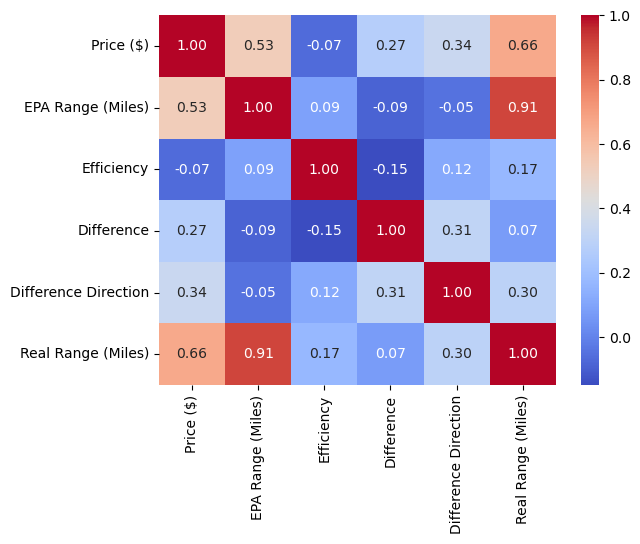

In [27]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

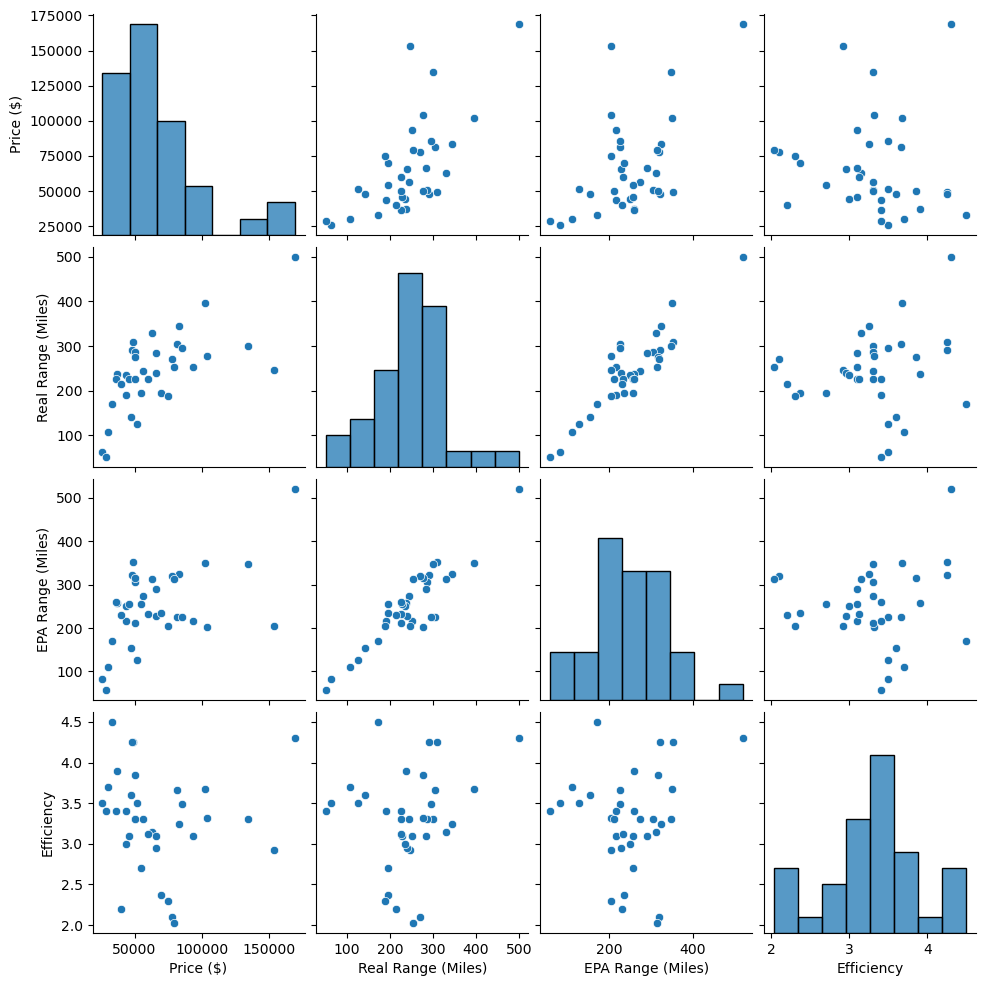

In [28]:
sns.pairplot(df[['Price ($)', 'Real Range (Miles)', 'EPA Range (Miles)', 'Efficiency']])


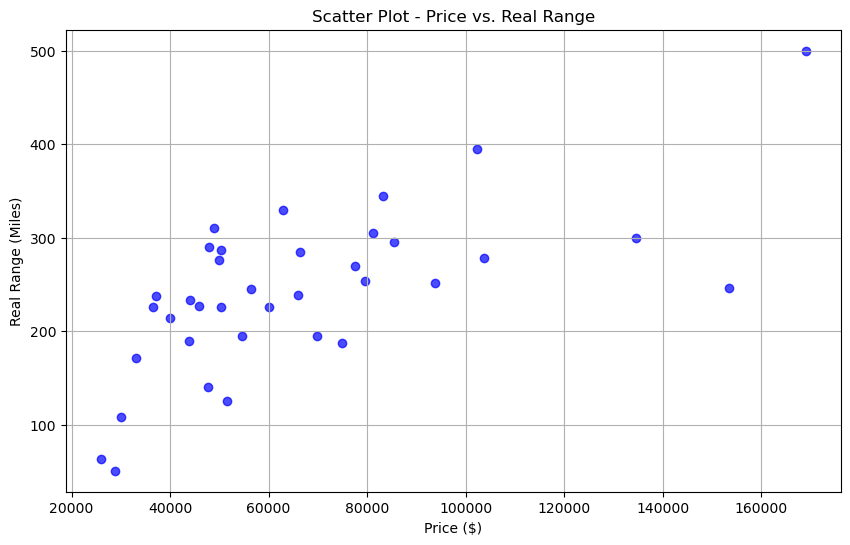

In [30]:
# Assuming 'df' is your DataFrame with columns 'Price' and 'Real Range (Miles)'
plt.figure(figsize=(10, 6))
plt.scatter(df['Price ($)'], df['Real Range (Miles)'], alpha=0.7, color='blue')
plt.title('Scatter Plot - Price vs. Real Range')
plt.xlabel('Price ($)')
plt.ylabel('Real Range (Miles)')
plt.grid(True)
plt.show()

## Buildin the Model

In [31]:
features = df[['Year', 'Price ($)', 'EPA Range (Miles)', 'Efficiency', 'Difference']]
target = df['Real Range (Miles)']

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [33]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predictions
predictions = model.predict(X_test)

In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 519.3429062377709


In [46]:
r2 = r2_score(y_test, predictions)

print(f'R-squared Score: {r2}')

R-squared Score: 0.8961388837701748
